In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os

In [37]:
base_path = os.getcwd()
df_buy_split = pd.read_csv(base_path + '/df_buy_split_final.csv')

In [38]:
df_n_buy_split = pd.read_csv(base_path + '/df_n_buy_split.csv')

In [39]:
df_buy_split = pd.concat([df_buy_split, df_n_buy_split])

In [5]:
transaction_new = pd.read_csv(base_path + '/transaction_final.csv')

In [6]:
product = pd.read_csv(base_path + '/product_final.csv', skiprows = [6043, 6568, 7398, 7938, 9025, 10263, 10426, 10904, 11372, 11944, 14111, 14531, 15075, 29905, 31624, 33019, 35747, 35961, 37769, 38104, 38274, 38403])

In [7]:
sales = pd.read_csv(base_path + '/sales.csv')
sales.head()

,customer_id,booking_id,sales
0,3,0b3f17a4-f733-4eac-b9e9-37c039746e95,174717
1,3,0fb5a9e6-f306-4c37-b7f0-992bc78064a7,189939
2,3,1229bd35-7747-447a-a60b-02860bf7da7e,287523
3,3,163e447d-f2c2-4fac-b8a1-015eb01afd41,359032
4,3,182774df-3cde-46cf-b302-4d93e0d94288,200436


In [8]:
df_buy_split.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12833602 entries, 0 to 370597
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0   session_id       object 
 1   event_name       object 
 2   event_time       object 
 3   traffic_source   object 
 4   product_id       float64
 5   quantity         int64  
 6   item_price       int64  
 7   payment_status   float64
 8   search_keywords  object 
 9   promo_code       float64
 10  promo_amount     float64
 11  customer_id      float64
 12  quarter          float64
 13  old_session      object 
 14  booking_id       object 
 15  sales            float64
 16  month            object 
dtypes: float64(7), int64(2), object(8)
memory usage: 1.7+ GB


In [9]:
df_buy_split.isnull().sum()

session_id                0
event_name                0
event_time                0
traffic_source            0
product_id         10896445
quantity                  0
item_price                0
payment_status     11981020
search_keywords    11660336
promo_code           370598
promo_amount         370598
customer_id          370598
quarter             1980696
old_session          370598
booking_id         10763683
sales                370598
month                370598
dtype: int64

In [10]:
df_buy_split.head()

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id,quarter,old_session,booking_id,sales,month
0,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,HOMEPAGE,2018-08-25 18:53:48.906490+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0.0,3.0,NaN,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,856b0c3d-b076-406b-be11-3dfee762e9be,826597.0,2018-08
1,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,CLICK,2018-08-25 18:53:51.906490+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0.0,3.0,NaN,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,856b0c3d-b076-406b-be11-3dfee762e9be,826597.0,2018-08
2,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,ADD_TO_CART,2018-08-25 18:53:53.906490+00:00,MOBILE,33350.0,1,318832,NaN,NaN,0.0,0.0,3.0,NaN,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,856b0c3d-b076-406b-be11-3dfee762e9be,826597.0,2018-08
3,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,ADD_TO_CART,2018-08-25 18:53:54.906490+00:00,MOBILE,56019.0,5,166934,NaN,NaN,0.0,0.0,3.0,NaN,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,856b0c3d-b076-406b-be11-3dfee762e9be,826597.0,2018-08
4,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,CLICK,2018-08-25 18:53:55.906490+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0.0,3.0,NaN,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,856b0c3d-b076-406b-be11-3dfee762e9be,826597.0,2018-08


In [12]:
df_buy_split.sort_values(by=['customer_id', 'event_time'], inplace=True)
df_buy_split.head()

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id,quarter,old_session,booking_id,sales_x,month,sales_y
0,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,HOMEPAGE,2018-08-25 18:53:48.906490+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0.0,3.0,NaN,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,856b0c3d-b076-406b-be11-3dfee762e9be,826597.0,2018-08,826597.0
1,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,CLICK,2018-08-25 18:53:51.906490+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0.0,3.0,NaN,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,856b0c3d-b076-406b-be11-3dfee762e9be,826597.0,2018-08,826597.0
2,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,ADD_TO_CART,2018-08-25 18:53:53.906490+00:00,MOBILE,33350.0,1,318832,NaN,NaN,0.0,0.0,3.0,NaN,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,856b0c3d-b076-406b-be11-3dfee762e9be,826597.0,2018-08,826597.0
3,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,ADD_TO_CART,2018-08-25 18:53:54.906490+00:00,MOBILE,56019.0,5,166934,NaN,NaN,0.0,0.0,3.0,NaN,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,856b0c3d-b076-406b-be11-3dfee762e9be,826597.0,2018-08,826597.0
4,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,CLICK,2018-08-25 18:53:55.906490+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0.0,3.0,NaN,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,856b0c3d-b076-406b-be11-3dfee762e9be,826597.0,2018-08,826597.0


In [13]:
booking_session_id = df_buy_split[df_buy_split.event_name == 'BOOKING'].session_id.unique()
no_booking_session_id = df_buy_split[~df_buy_split.session_id.isin(booking_session_id)].session_id.unique()
no_booking_session_id

array(['36673b2f-940a-42b5-994d-1cce4796b55f',
       '36673b2f-940a-42b5-994d-1cce4796b55f_0',
       '36673b2f-940a-42b5-994d-1cce4796b55f_1', ...,
       'f49a7504-1ae0-4a92-abf6-dfd4488b4956',
       '2b485a58-f1df-4f84-9875-86fad901e79b',
       '3df21989-09b7-46da-9421-67d774bd9adf_1'], dtype=object)

In [14]:
df_buy_split.loc[df_buy_split.session_id.isin(no_booking_session_id), 'booking_id'] = np.NaN

In [15]:
df_buy_split.booking_id.isnull().sum()

10763683

# 방문의 영향력 파악

## 1. 구매자 중 첫 방문 구매 비율

In [16]:
# df_buy_split.groupby(['customer_id', 'session_id'])
first_session_id = df_buy_split.groupby('customer_id').first()['session_id']
first_session_id.head()

customer_id
3.0       f03b6825-1e6e-4916-bf71-f94ecbcbaee5
8.0     cb2e3df3-6342-43e2-be2b-f19c79e92a1e-1
9.0     f23e77b3-d85c-4468-ada0-9f7fb9defe1e-2
11.0    5f20fb20-8e35-4e30-a9d9-fc6a07d7835c-1
15.0    fe015013-09fd-4218-ab69-cb18706e63a7-3
Name: session_id, dtype: object

In [17]:
# 구매회원 첫 session_id에서 한 행동 모음
first_session = df_buy_split[df_buy_split['session_id'].isin(first_session_id)][['session_id', 'event_name']]
first_session.head()

,session_id,event_name
0,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,HOMEPAGE
1,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,CLICK
2,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,ADD_TO_CART
3,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,ADD_TO_CART
4,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,CLICK


In [18]:
# 구매회원이 첫 session_id에서 구매했는지 여부
first_buy_session = first_session.groupby('session_id').apply(lambda x: x.isin(['BOOKING']).any())

In [19]:
num_first_buy_session = first_session.groupby('session_id')['event_name'].apply(lambda x: x.isin(['BOOKING']).any()).sum()
num_first_add_to_cart_session = first_session.groupby('session_id')['event_name'].apply(lambda x: x.isin(['ADD_TO_CART']).any()).sum()

In [20]:
print(f'구매자 중 첫 세션에서 구매를 한 비율: {round(num_first_buy_session / df_buy_split.customer_id.nunique() * 100, 2)}%')
print(f'구매자 중 첫 세션에서 장바구니까지 넣은 비율: {round(num_first_add_to_cart_session / df_buy_split.customer_id.nunique() * 100, 2)}%')

구매자 중 첫 세션에서 구매를 한 비율: 95.07%
구매자 중 첫 세션에서 장바구니까지 넣은 비율: 99.92%


## 2. 방문횟수별 그룹 분석

### 결론 : 방문횟수가 많은 그룹일수록 구매 전환률이 낮다.

In [21]:
# 방문횟수별 그룹 나누기
customer_session = df_buy_split.groupby('customer_id')['session_id'].nunique()
customer_session

customer_id
3.0        566
8.0        188
9.0         41
11.0         1
15.0        40
          ... 
99992.0     63
99995.0    727
99997.0      1
99998.0    329
99999.0      1
Name: session_id, Length: 50704, dtype: int64

In [22]:
customer_session.describe()

count    50704.000000
mean       183.786388
std        351.879678
min          1.000000
25%          8.000000
50%         49.000000
75%        190.000000
max       6456.000000
Name: session_id, dtype: float64

In [23]:
(df_buy_split.groupby('customer_id').booking_id.nunique() / df_buy_split.groupby('customer_id').session_id.nunique()).mean()

0.3079421260933131

In [25]:
visit_CVR_dict = {'num_visit':[], 'CVR_mean':[]}
for num_visit in sorted(customer_session.unique()):
    target_id = customer_session[customer_session == num_visit].index
    target_info = df_buy_split[df_buy_split.customer_id.isin(target_id)].groupby('customer_id')

    # 방문 횟수
    visit_CVR_dict['num_visit'].append(num_visit)

    # 구매전환율 평균
    visit_CVR_dict['CVR_mean'].append((target_info.booking_id.nunique() / target_info.session_id.nunique()).mean())

In [26]:
visit_CVR = pd.DataFrame(visit_CVR_dict)
visit_CVR.reset_index(drop = True, inplace = True)
visit_CVR = visit_CVR[visit_CVR.num_visit >= 2]
visit_CVR


,num_visit,CVR_mean
1,2,0.524660
2,3,0.615385
3,4,0.504945
4,5,0.402789
5,6,0.345622
...,...,...
2001,4579,0.095217
2002,4749,0.083597
2003,5041,0.093831
2004,5516,0.091189


<Axes: xlabel='num_visit', ylabel='CVR_mean'>

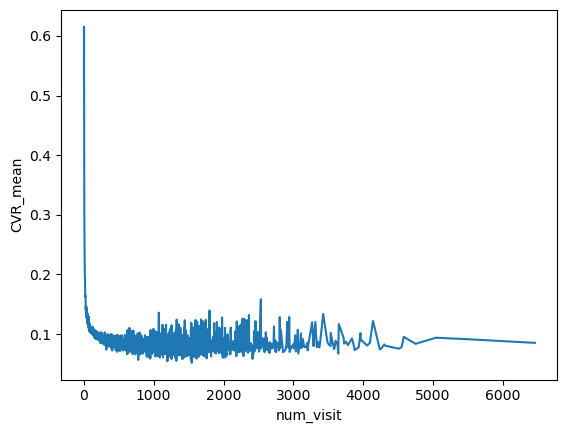

In [27]:
sns.lineplot(visit_CVR, x='num_visit', y='CVR_mean')

In [28]:
customer_session.describe()

count    50704.000000
mean       183.786388
std        351.879678
min          1.000000
25%          8.000000
50%         49.000000
75%        190.000000
max       6456.000000
Name: session_id, dtype: float64

In [29]:
visit_CVR[visit_CVR.num_visit <= 8].CVR_mean.mean()

0.42676456570337606

In [30]:
visit_CVR[(visit_CVR.num_visit > 8) & (visit_CVR.num_visit <= 49)].CVR_mean.mean()

0.1600960713755304

In [31]:
visit_CVR[(visit_CVR.num_visit > 49) & (visit_CVR.num_visit <= 190)].CVR_mean.mean()

0.10618329838866539

In [32]:
visit_CVR[(visit_CVR.num_visit > 190)].CVR_mean.mean()

0.08347601959463719

In [33]:
customer_booking = df_buy_split.groupby('customer_id')['booking_id'].nunique()
customer_booking

customer_id
3.0        51
8.0         7
9.0         6
11.0        1
15.0        5
           ..
99992.0    12
99995.0    60
99997.0     1
99998.0     8
99999.0     1
Name: booking_id, Length: 50704, dtype: int64

# 기간별 구매전환율 

In [43]:
df_buy_split.month = pd.to_datetime(df_buy_split.event_time).dt.to_period('M')

/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_33466/1604012600.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_buy_split.month = pd.to_datetime(df_buy_split.event_time).dt.to_period('M')


0

In [58]:
session_info = df_buy_split.groupby('month')[['session_id']].nunique()
session_info.reset_index(inplace=True)
session_info['diff_sessionpct'] = session_info.session_id.pct_change() *100
session_info

,month,session_id,diff_sessionpct
0,2016-06,1,NaN
1,2016-07,773,77200.000000
2,2016-08,2281,195.084088
3,2016-09,4925,115.914073
4,2016-10,7050,43.147208
...,...,...,...
70,2022-04,329894,0.759605
71,2022-05,340612,3.248922
72,2022-06,313952,-7.827088
73,2022-07,230988,-26.425696


In [ ]:
# session_id 별로 한번에 BOOKING만 있었던 것을 확인
# 월별 BOOKING을 한 session_id의 unique값 수 = 월별 BOOKING을 한 BOOKING 이벤트 수
(df_buy_split[df_buy_split.event_name == 'BOOKING'].groupby(['month'])['session_id'].nunique() == df_buy_split[df_buy_split.event_name == 'BOOKING'].groupby(['month']).count()['event_name']).sum()

74

In [59]:
df_buy_split[df_buy_split.event_name == 'ADD_TO_CART'].groupby('month').session_id.nunique()

month
2016-06        1
2016-07      334
2016-08      741
2016-09     1142
2016-10     1714
           ...  
2022-03    52083
2022-04    51554
2022-05    51733
2022-06    43697
2022-07    28428
Freq: M, Name: session_id, Length: 74, dtype: int64

In [61]:
# 장바구니 세션 수(Micro CVR)
session_info = pd.merge(session_info, df_buy_split[df_buy_split.event_name == 'ADD_TO_CART'].groupby('month').session_id.nunique(), how='left', on='month')

# 구매 세션 수(Macro CVR)
session_info = pd.merge(session_info, df_buy_split[df_buy_split.event_name == 'BOOKING'].groupby(['month']).count()['event_name'], on='month', how='left')

In [62]:
session_info.rename(columns = {'session_id_x':'num_session_id', 'session_id_y':'num_add_to_cart', 'event_name':'num_booking'}, inplace = True)

In [63]:
session_info['micro_cvr'] = session_info.num_add_to_cart / session_info.num_session_id
session_info['macro_cvr'] = session_info.num_booking / session_info.num_session_id

In [64]:
session_info['cart_buy_cvr'] = session_info.num_booking / session_info.num_add_to_cart

In [65]:
session_info_all = session_info[(session_info.month >= '2016-07') & (session_info.month <= '2022-07')]
session_info_part = session_info[(session_info.month >= '2020-08') & (session_info.month <= '2022-07')]
session_info_all.month = session_info_all.month.astype('str')
session_info_part.month = session_info_part.month.astype('str')

/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_33466/3969820811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_info_all.month = session_info_all.month.astype('str')
/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_33466/3969820811.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_info_part.month = session_info_part.month.astype('str')


/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_33466/3299412220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_info_all.month = session_info_all.month.astype('str')


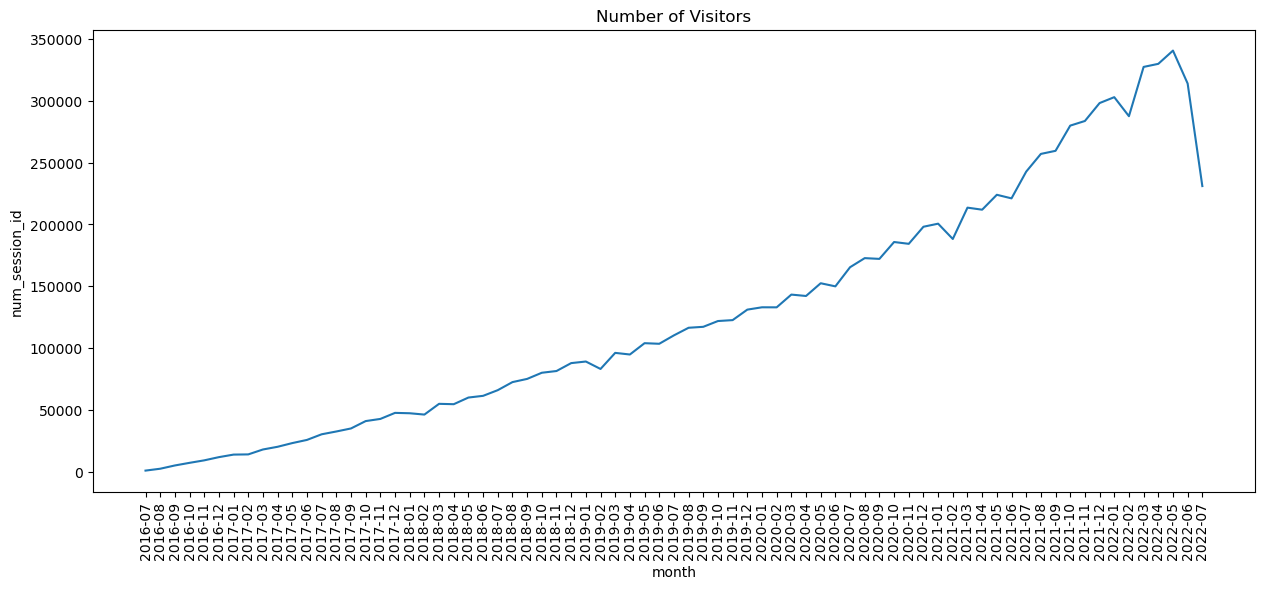

In [67]:
# 전체기간 방문 수
session_info_all.month = session_info_all.month.astype('str')
plt.figure(figsize=(15,6))
sns.lineplot(data = session_info_all, x = 'month', y = 'num_session_id')
plt.xticks(rotation=90)
plt.title('Number of Visitors')
plt.show()

/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_33466/1975785233.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_info_part.month = session_info_part.month.astype('str')


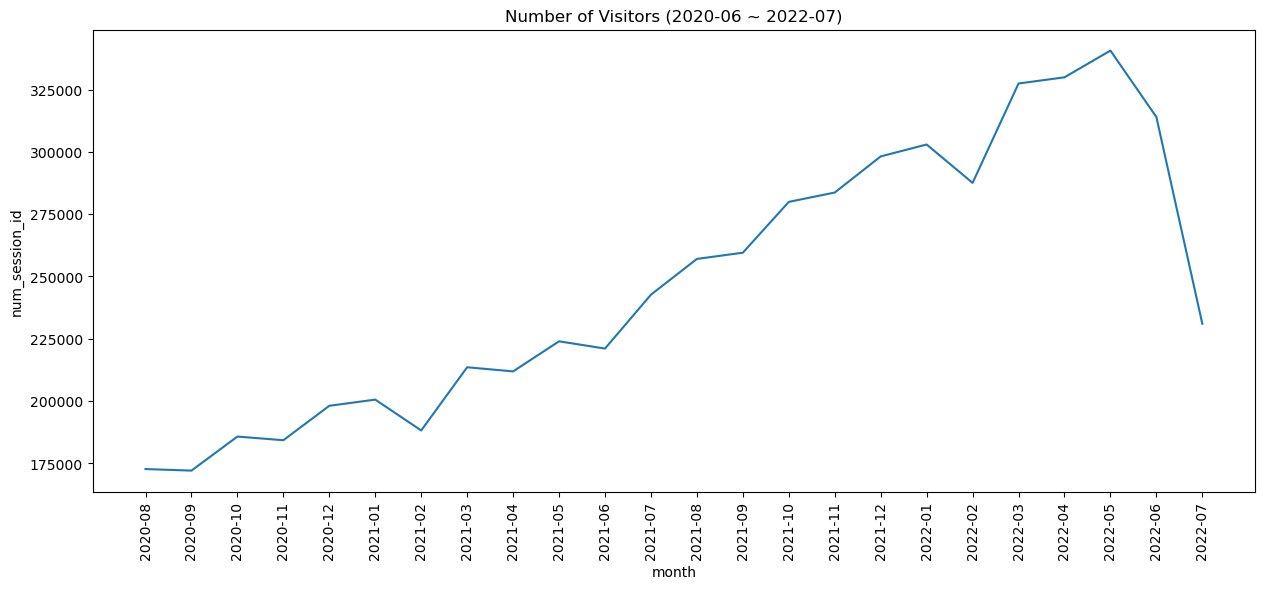

In [69]:
# 최근 2년 간(2020-06 ~ 2022-07) 구매방문 수
# 2022월 6월, 7월에 session 수(방문 수) 감소 - 6월에는 -7.9%, 7월에는 -27.1%

session_info_part.month = session_info_part.month.astype('str')
plt.figure(figsize=(15,6))
sns.lineplot(data = session_info_part, x = 'month', y = 'num_session_id')
plt.xticks(rotation=90)
plt.title('Number of Visitors (2020-06 ~ 2022-07)')
plt.show()

In [71]:
session_info

,month,num_session_id,diff_sessionpct,num_add_to_cart,num_booking,micro_cvr,macro_cvr,cart_buy_cvr
0,2016-06,1,NaN,1.0,1.0,1.000000,1.000000,1.000000
1,2016-07,773,77200.000000,334.0,296.0,0.432083,0.382924,0.886228
2,2016-08,2281,195.084088,741.0,547.0,0.324858,0.239807,0.738192
3,2016-09,4925,115.914073,1142.0,717.0,0.231878,0.145584,0.627846
4,2016-10,7050,43.147208,1714.0,989.0,0.243121,0.140284,0.577013
...,...,...,...,...,...,...,...,...
70,2022-04,329894,0.759605,51554.0,29237.0,0.156274,0.088625,0.567114
71,2022-05,340612,3.248922,51733.0,30084.0,0.151882,0.088323,0.581524
72,2022-06,313952,-7.827088,43697.0,28587.0,0.139184,0.091055,0.654210
73,2022-07,230988,-26.425696,28428.0,25162.0,0.123071,0.108932,0.885113


In [72]:
# 기간 전체 평균 CVR (2016년 6월 제외 (거래가 1건밖에 없었음))
print(f'micro_cvr: {session_info_all.micro_cvr.mean()}')
print(f'macro_cvr: {session_info_all.macro_cvr.mean()}')

micro_cvr: 0.1920677251070656
macro_cvr: 0.10070649086355316


In [73]:
# 최근 2년 평균 구매전환율
print(f'micro_cvr of recent 2 years: {session_info_part.micro_cvr.mean()}')
print(f'macro_cvr of recent 2 years: {session_info_part.macro_cvr.mean()}')

micro_cvr of recent 2 years: 0.1680717814447511
macro_cvr of recent 2 years: 0.08997542736860174


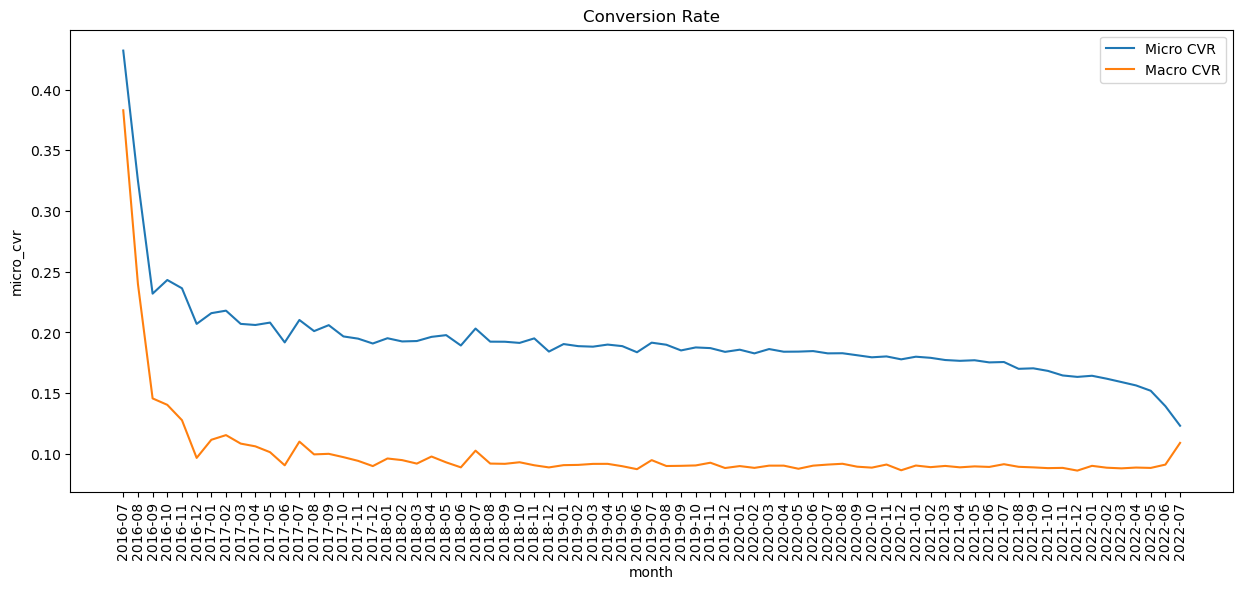

In [74]:
plt.figure(figsize=(15,6))
sns.lineplot(data = session_info_all, x = 'month', y='micro_cvr', label='Micro CVR')
sns.lineplot(data = session_info_all, x = 'month', y='macro_cvr', label='Macro CVR')
plt.xticks(rotation=90)
plt.title('Conversion Rate')
plt.legend()
plt.show()

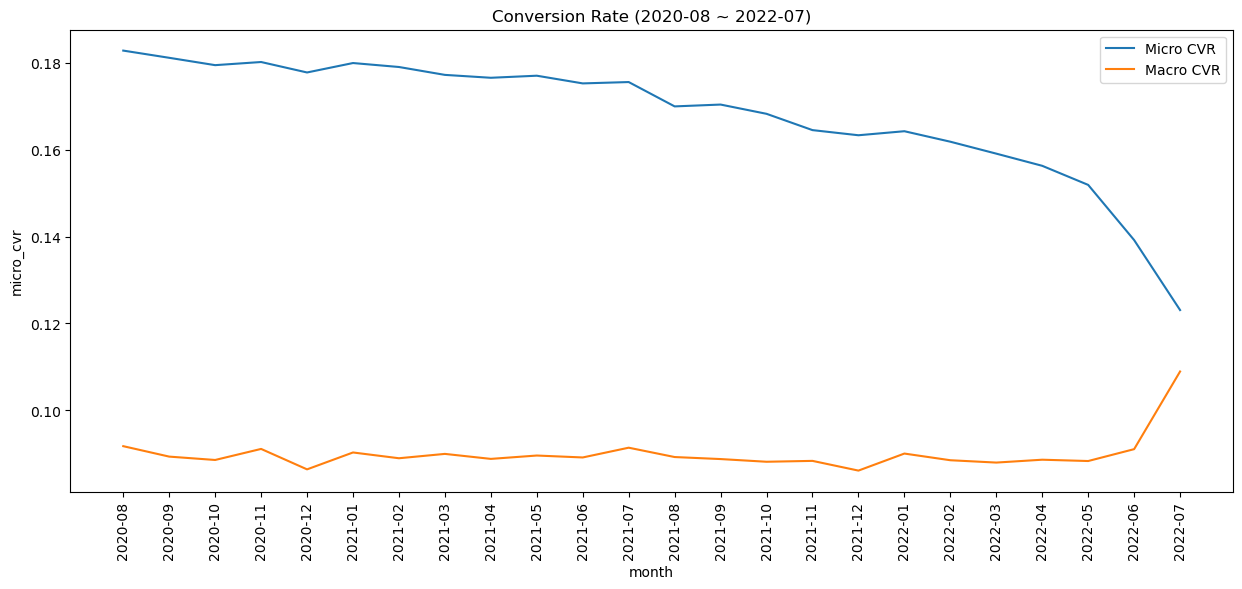

In [75]:
plt.figure(figsize=(15,6))
sns.lineplot(data = session_info_part, x = 'month', y='micro_cvr', label='Micro CVR')
sns.lineplot(data = session_info_part, x = 'month', y='macro_cvr', label='Macro CVR')
plt.xticks(rotation=90)
plt.title('Conversion Rate (2020-08 ~ 2022-07)')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


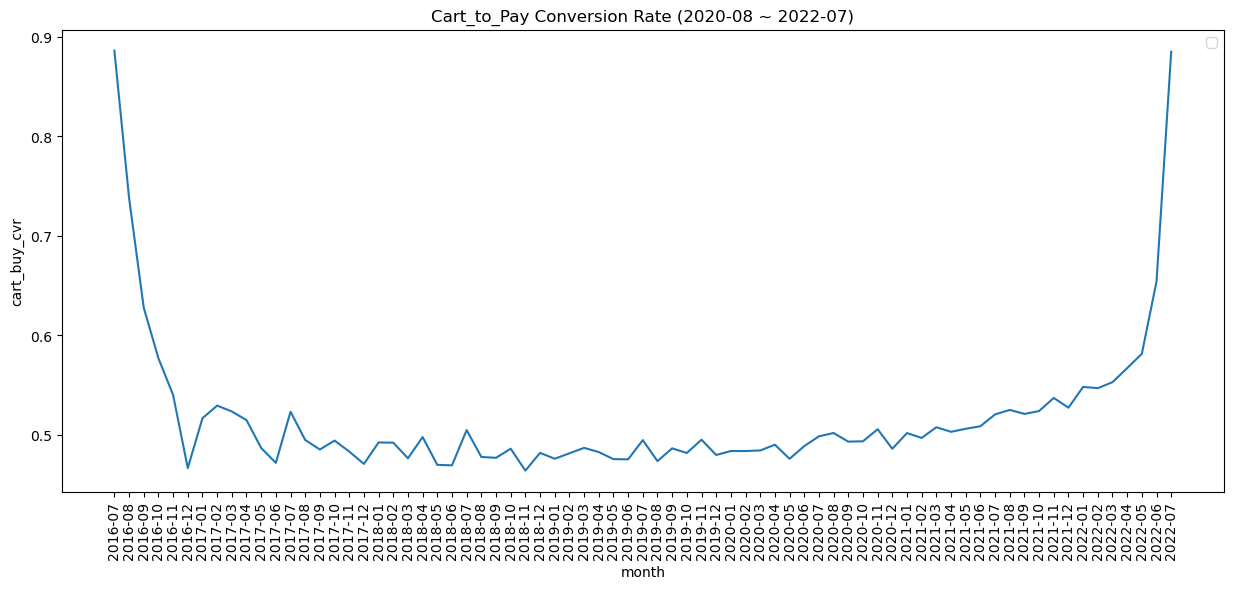

In [77]:
plt.figure(figsize=(15,6))
sns.lineplot(data = session_info_all, x = 'month', y='cart_buy_cvr')
plt.xticks(rotation=90)
plt.title('Cart_to_Pay Conversion Rate (2020-08 ~ 2022-07)')
plt.legend()
plt.show()

In [83]:
len(df_buy_split[df_buy_split['event_name'] == 'BOOKING'].session_id.unique())

852582

In [91]:
df_buy_split[df_buy_split['event_name'] == 'ADD_TO_CART'].session_id.unique()

array(['f03b6825-1e6e-4916-bf71-f94ecbcbaee5',
       '36673b2f-940a-42b5-994d-1cce4796b55f_0',
       '36673b2f-940a-42b5-994d-1cce4796b55f', ...,
       'fff55bcc-4d59-46e1-8e48-7c7f585121ce',
       'fffa75c4-da76-42d7-b53e-2bbf79f2a4a9',
       'fffe9f81-7737-47de-9468-8b7b7f93c25d'], dtype=object)

In [127]:
add_to_cart_session_ids = df_buy_split[df_buy_split['event_name'] == 'ADD_TO_CART'].session_id.unique()
booking_session_ids = df_buy_split[df_buy_split['event_name'] == 'BOOKING'].session_id.unique()

missing_add_to_cart = df_buy_split[~df_buy_split['session_id'].isin(df_buy_split[df_buy_split['event_name'] == 'ADD_TO_CART'].session_id.unique()) & (df_buy_split['event_name'] == 'BOOKING')]

In [120]:
missing_booking = df_buy_split[~df_buy_split['session_id'].isin(booking_session_ids) & (df_buy_split['event_name'] == 'ADD_TO_CART')]

In [131]:
cart_pay = df_buy_split[df_buy_split['session_id'].isin(booking_session_ids) & (df_buy_split['event_name'] == 'ADD_TO_CART')]

In [129]:
df_buy_split[df_buy_split.session_id == '36673b2f-940a-42b5-994d-1cce4796b55f_0']

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id,quarter,old_session,booking_id,sales,month
9,36673b2f-940a-42b5-994d-1cce4796b55f_0,ADD_TO_CART,2018-09-19 16:29:14.844494+00:00,MOBILE,16748.0,1,578636,NaN,NaN,0.0,0.0,3.0,NaN,36673b2f-940a-42b5-994d-1cce4796b55f,NaN,153784.0,2018-09


In [132]:
missing_booking

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,customer_id,quarter,old_session,booking_id,sales,month
3,00038f48-10a2-4752-bdcf-4d12b5731f6e,ADD_TO_CART,2021-01-16 16:59:24.918402+00:00,MOBILE,20886.0,1,629485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01
17,00051df2-4589-43ec-9ef7-d5527ad793a5,ADD_TO_CART,2021-07-04 23:46:25.236904+00:00,MOBILE,33822.0,1,195617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07
18,00051df2-4589-43ec-9ef7-d5527ad793a5,ADD_TO_CART,2021-07-04 23:48:22.236904+00:00,MOBILE,50236.0,1,276080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07
21,00051df2-4589-43ec-9ef7-d5527ad793a5,ADD_TO_CART,2021-07-04 23:53:48.236904+00:00,MOBILE,54144.0,2,183666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07
23,00051df2-4589-43ec-9ef7-d5527ad793a5,ADD_TO_CART,2021-07-04 23:57:52.236904+00:00,MOBILE,4021.0,1,398842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370570,fffa75c4-da76-42d7-b53e-2bbf79f2a4a9,ADD_TO_CART,2018-01-10 02:16:19.845153+00:00,MOBILE,36979.0,1,228468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01
370576,fffa75c4-da76-42d7-b53e-2bbf79f2a4a9,ADD_TO_CART,2018-01-10 02:17:24.845153+00:00,MOBILE,27669.0,1,422820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01
370586,fffa75c4-da76-42d7-b53e-2bbf79f2a4a9,ADD_TO_CART,2018-01-10 02:19:46.845153+00:00,MOBILE,12477.0,1,424877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01
370588,fffa75c4-da76-42d7-b53e-2bbf79f2a4a9,ADD_TO_CART,2018-01-10 02:20:11.845153+00:00,MOBILE,48525.0,1,232597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01
